# 1. Install and Import Dependencies

In [1]:
# # GitHub repo installation of paddle
# !python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

In [2]:
# # Install paddle OCR
# !pip install paddleocr

In [3]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import os
from pdf2image import convert_from_path

[2021/10/19 03:43:10] matplotlib DEBUG: matplotlib data path: c:\Users\Jun\Desktop\RDS3\FYP2\venv\lib\site-packages\matplotlib\mpl-data
[2021/10/19 03:43:10] matplotlib DEBUG: CONFIGDIR=C:\Users\Jun\.matplotlib
[2021/10/19 03:43:10] matplotlib DEBUG: matplotlib version 3.4.3
[2021/10/19 03:43:10] matplotlib DEBUG: interactive is False
[2021/10/19 03:43:10] matplotlib DEBUG: platform is win32
[2021/10/19 03:43:10] matplotlib DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'nt', 'winreg', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'ntpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'encodings.cp1252', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'import

In [4]:
# Store pdf with convert_from_path function
images = convert_from_path(pdf_path='Data Folder/BCA.pdf', dpi=350)
for index, img in enumerate(images):
    img.save(f'Output (Images)\page{index + 1}.jpg', 'JPEG')

# 2. Instantiate Model and Detect

In [5]:
ocr_model = PaddleOCR(use_angle_cls = True, use_gpu = False)

[2021/10/19 03:43:15] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Jun/.paddleocr/2.3.0.1\\ocr\\det\\ch\\ch_PP-OCRv2_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, rec_algorithm='CRNN', rec_model_dir='C:\\Users\\Jun/.paddleocr/2.3.0.1\\ocr\\rec\\ch\\ch_PP-OCRv2_rec_infer', rec_image_shape='3, 32, 320', rec_char_type='ch', rec_batch_num=6, max_text_length=25, rec_char_dict_path='c:\\Users\\Jun\\Desktop\\RDS3\\FYP2\\venv\\lib\\site-packages\\paddleocr\\ppocr\\utils\\

In [6]:
img_path = os.path.join('.', 'Output (Images)\page1.jpg')
img_path

'.\\Output (Images)\\page1.jpg'

In [7]:
result = ocr_model.ocr(img_path, cls=True)

[2021/10/19 03:43:18] root DEBUG: dt_boxes num : 103, elapse : 1.5336203575134277
[2021/10/19 03:43:21] root DEBUG: cls num  : 103, elapse : 3.016846179962158
[2021/10/19 03:43:43] root DEBUG: rec_res num  : 103, elapse : 22.356895208358765


In [8]:
result

[[[[116.0, 217.0], [547.0, 217.0], [547.0, 354.0], [116.0, 354.0]],
  ('QBCA', 0.7370462)],
 [[[1025.0, 269.0], [1864.0, 269.0], [1864.0, 341.0], [1025.0, 341.0]],
  ('REKENING TAHAPAN', 0.95745254)],
 [[[142.0, 469.0], [379.0, 469.0], [379.0, 516.0], [142.0, 516.0]],
  ('SOE TA WIE', 0.93496895)],
 [[[1576.0, 473.0], [1886.0, 473.0], [1886.0, 520.0], [1576.0, 520.0]],
  ('NO.REKENING', 0.9945841)],
 [[[2135.0, 473.0], [2368.0, 473.0], [2368.0, 520.0], [2135.0, 520.0]],
  ('7030073392', 0.9189453)],
 [[[142.0, 525.0], [340.0, 525.0], [340.0, 571.0], [142.0, 571.0]],
  ('CIPONDOH', 0.9668003)],
 [[[1584.0, 546.0], [1800.0, 546.0], [1800.0, 593.0], [1584.0, 593.0]],
  ('HALAMAN', 0.983055)],
 [[[2140.0, 546.0], [2247.0, 546.0], [2247.0, 593.0], [2140.0, 593.0]],
  ('1/4', 0.98745507)],
 [[[138.0, 580.0], [598.0, 580.0], [598.0, 635.0], [138.0, 635.0]],
  ('PETIR RT 013 RW 003', 0.9612704)],
 [[[1584.0, 614.0], [1774.0, 614.0], [1774.0, 661.0], [1584.0, 661.0]],
  ('PERIODE', 0.9951858)],

In [9]:
# Box coordinates
result[0][0]

[[116.0, 217.0], [547.0, 217.0], [547.0, 354.0], [116.0, 354.0]]

In [10]:
# Test and its confidence scores
result[0][1]

('QBCA', 0.7370462)

In [11]:
# Print all texts on an image (page 1)
for res in result:
    print(res[1][0])

QBCA
REKENING TAHAPAN
SOE TA WIE
NO.REKENING
7030073392
CIPONDOH
HALAMAN
1/4
PETIR RT 013 RW 003
PERIODE
JANUARI 2021
JL PETIR UTAMA 66
MATA UANG
IDR
TANGERANG 15147
INDONESIA
Mutasi Rekening ini sampa
Apabila
BCA berhak
menyetujui segala data yang
Rekening.
aLaporan MutasiReke
CBG
TANGGAL
KETERANGAN
MUTASI
saldo
01/01
SALDO AWAL
636,953,471.73
3.ADM KLIRINC
7030
ATIS
2000.00 DB
636,951,471.73
TRSF E-BANKING CR
0401/FTSCY/WS95051
100,000,000.00
O DEVIDEN
TIGA CAKRA SUKSES
18/.8
TARIKAN ATM 04/01
500,000.00 DB
0401/FTSCY/WS95011
2,000,000.00
2000000.00
Selisih ATK
SOE TA WIE
04/01
TRSF E-BANKING DB
0401/FTSCY/WS95051
100,000.00DB
100000.00
Tzu Chi
04/01
TRSF E-BANKING CR
0401/FTSCY/WS9505
2,045,567.00
2045567.00
P DEVIDEN
TIGA CAKRA SUKSES
04/01
KARTU DEBIT
727,100.00 DB
04/01
TRSF E-BANKING DB
501,000.00 DB
39358/0VO
087887950120
04/01
TRSF E-BANKING CR
46,276,830.00
46276830.00
1S5811
E TA WIE
SOE TA WIE
TRSF E-BANKING DB
0401/FTSCY/WS95051
04/01
1,300,000.00 DB
784,145,768.73
1300000

In [12]:
# Store all texts in a comprehension list
[res[1][0] for res in result]

['QBCA',
 'REKENING TAHAPAN',
 'SOE TA WIE',
 'NO.REKENING',
 '7030073392',
 'CIPONDOH',
 'HALAMAN',
 '1/4',
 'PETIR RT 013 RW 003',
 'PERIODE',
 'JANUARI 2021',
 'JL PETIR UTAMA 66',
 'MATA UANG',
 'IDR',
 'TANGERANG 15147',
 'INDONESIA',
 'Mutasi Rekening ini sampa',
 'Apabila',
 'BCA berhak',
 'menyetujui segala data yang',
 'Rekening.',
 'aLaporan MutasiReke',
 'CBG',
 'TANGGAL',
 'KETERANGAN',
 'MUTASI',
 'saldo',
 '01/01',
 'SALDO AWAL',
 '636,953,471.73',
 '3.ADM KLIRINC',
 '7030',
 'ATIS',
 '2000.00 DB',
 '636,951,471.73',
 'TRSF E-BANKING CR',
 '0401/FTSCY/WS95051',
 '100,000,000.00',
 'O DEVIDEN',
 'TIGA CAKRA SUKSES',
 '18/.8',
 'TARIKAN ATM 04/01',
 '500,000.00 DB',
 '0401/FTSCY/WS95011',
 '2,000,000.00',
 '2000000.00',
 'Selisih ATK',
 'SOE TA WIE',
 '04/01',
 'TRSF E-BANKING DB',
 '0401/FTSCY/WS95051',
 '100,000.00DB',
 '100000.00',
 'Tzu Chi',
 '04/01',
 'TRSF E-BANKING CR',
 '0401/FTSCY/WS9505',
 '2,045,567.00',
 '2045567.00',
 'P DEVIDEN',
 'TIGA CAKRA SUKSES',
 '04/01

# 3. Visualise Results

In [13]:
boxes = [res[0] for res in result]
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [14]:
# Specifying font path for draw_ocr method
font_path = os.path.join('fonts', 'latin.ttf')
font_path

'fonts\\latin.ttf'

In [15]:
# Imports image
img = cv2.imread(img_path) 

# Reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

[2021/10/19 03:43:49] matplotlib.font_manager DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2021/10/19 03:43:49] matplotlib.font_manager DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
[2021/10/19 03:43:49] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
[2021/10/19 03:43:49] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
[2021/10/19 03:43:49] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
[2021/10/19 03:43:49] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
[2021/10/19 03:43:49] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVu

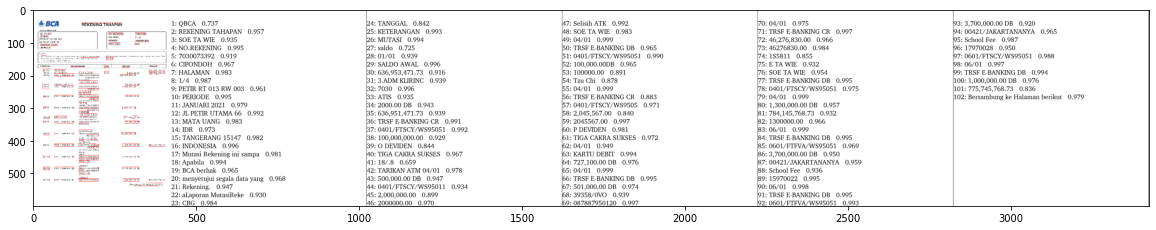

In [16]:
# Visualize our image and detections

# Resizing display area
plt.figure(figsize=(20, 20))

# Draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# Show the image using matplotlib
plt.imshow(annotated)

In [17]:
# Draw results using PIL

from PIL import Image
import numpy as np

# Reorders the color channels of the image
image = Image.open(img_path).convert('RGB')

# Draw annotations on image
annotated = draw_ocr(image, boxes, texts, scores, font_path=font_path) 
annotated_image = Image.fromarray(annotated)

# Save the image
annotated_image.save('result.jpg')

# Visualise the image
Image.open('result.jpg', 'r').show()